In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from surprise import Dataset
# from surprise import Reader
# from surprise.model_selection import cross_validate
# from surprise.model_selection import GridSearchCV
# from surprise import KNNBasic, KNNWithMeans, KNNWithZScore
# from surprise import SVD, SVDpp, NMF
# from surprise import SlopeOne, CoClustering

rating = pd.read_csv('./ratings_drop.csv' , usecols=[ 'userId' , 'productId' , 'rating'] )
products = pd.read_csv('./products_join_categories.csv')
products = products.loc[:, ~products.columns.str.contains('^Unnamed')]
products.set_index( ['productId'] , inplace=True, drop=True )
products = products.rename({'name': 'product_name'}, axis='columns')
display(products.head())

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
0,CSSMs Biology: Control in Cells and in Organis...,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
1,Treasure Island,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
2,Collins Primary Dictionaries – Collins Junior ...,"832,476,739",832,图书音像,476,其它图书,739.0,工具书
3,Partners in Crime,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
4,The Hobbit,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿


In [3]:
display(rating.head())

,userId,productId,rating
0,15905.0,452609,5.0
1,94522.0,452609,5.0
2,317087.0,452609,5.0
3,1329103.0,452609,5.0
4,502593.0,452609,5.0


In [4]:
display(rating.describe())

,userId,productId,rating
count,7.202839e+06,7.202921e+06,7.202920e+06
mean,3.368837e+05,2.651382e+05,4.277313e+00
std,3.619076e+05,1.525959e+05,1.060728e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.653000e+04,1.331870e+05,4.000000e+00
50%,1.915990e+05,2.667810e+05,5.000000e+00
75%,5.283595e+05,3.965950e+05,5.000000e+00
max,1.424594e+06,5.256180e+05,5.000000e+00


In [5]:
print('No. of Unique Users    :', rating.userId.nunique())
print('No. of Unique Products :', rating.productId.nunique())
print('No. of Unique Ratings  :', rating.rating.nunique())

No. of Unique Users    : 1424595
No. of Unique Products : 525619
No. of Unique Ratings  : 6


In [6]:
ratingViaUserCount = rating.groupby(by=['rating']).agg({'userId': 'count'}).reset_index()
ratingViaUserCount.columns = ['rating', 'Count']

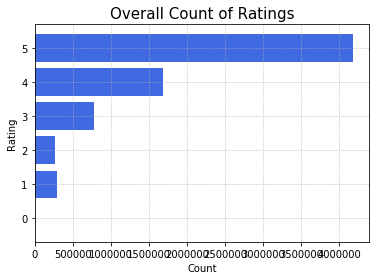

,rating,Count
0,0.0,1
1,1.0,293748
2,2.0,261960
3,3.0,781982
4,4.0,1680574


In [7]:
plt.barh(ratingViaUserCount.rating, ratingViaUserCount.Count, color='royalblue')
plt.title('Overall Count of Ratings', fontsize=15)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Rating', fontsize=10)
plt.grid(ls='dotted')
plt.show()
display(ratingViaUserCount.head())

In [8]:
userRatingCount = rating['userId'].value_counts();
ratingFiltered = rating[rating['userId'].isin(userRatingCount[userRatingCount >= 50 ].index)]
print(ratingFiltered.shape)
print(rating.shape)
productRatingCount = rating['productId'].value_counts();
ratingFiltered = ratingFiltered[ratingFiltered['userId'].isin(productRatingCount[productRatingCount >= 100 ].index)]
print(ratingFiltered.shape)

(1847803, 3)
(7202921, 3)
(35024, 3)


In [9]:
# reader = Reader(rating_scale=(1, 5))
# data = Dataset.load_from_df(ratingFiltered[['userId', 'productId', 'rating']], reader)

In [10]:
display(products.sample(10))
display(ratingFiltered.sample(10))
display(ratingFiltered.shape)

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
103293,"ASD爱仕达不锈钢汤锅C1722(不锈钢复底,电磁炉通用)","933,833,950",933,家居生活,833,厨房/餐具,950.0,锅具
165978,根除惯性:陀思妥耶夫斯基与形而上学(套装上下册),"832,723,396",832,图书音像,723,人文社科类图书,396.0,哲学/宗教
31676,Geepoo 小猪快跑 婴幼儿鞋/宝宝鞋 G3331,"802,777,601",802,服饰服装,777,童装/童鞋/亲子装,601.0,童鞋
81855,波斯顿瞬爽醒肤两件套(瞬爽醒肤洁面膏128g+瞬爽醒肤凝露80g),"916,451,630",916,美妆个护,451,面部护理,630.0,其他面部护理
437932,新东方????新托福考试核心语法(附MP3光盘1张),"832,1101,1116",832,图书音像,1101,少儿/教育图书,1116.0,考试
95089,泰戈尔散文诗全集(07版),"832,519,599",832,图书音像,519,文学艺术,599.0,文学类
386512,三国演义,"832,519,1",832,图书音像,519,文学艺术,1.0,小说
441482,2014年考研政治20年真题大讲评,"832,1101,1116",832,图书音像,1101,少儿/教育图书,1116.0,考试
377345,童眼识天下:奇妙植物,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿


,userId,productId,rating
4457772,3204.0,14074,5.0
442780,17750.0,40096,1.0
4362094,47.0,400468,5.0
3005486,858.0,166013,4.0
6978539,166885.0,358599,4.0
6909353,149398.0,274041,5.0
6612953,139986.0,297393,3.0
4829884,55410.0,116311,5.0
3867165,5693.0,56048,4.0
2602896,858.0,321410,5.0


(35024, 3)

In [11]:
ratingFiltered.drop_duplicates(subset=['userId', 'productId'], keep='first' , inplace =True )
ratingFilteredPivot = ratingFiltered.pivot( index='userId' , columns='productId' , values="rating" ).fillna(0)

In [12]:
print('No. of Unique Users    :', ratingFiltered.userId.nunique())
print('No. of Unique Products :', ratingFiltered.productId.nunique())
print('No. of Unique Ratings  :', ratingFiltered.rating.nunique())
print(products.iloc[1].product_name)
print(ratingFiltered.iloc[0].userId)
print(ratingFiltered.loc[198])
print(ratingFiltered.index.get_loc(198))
display(ratingFilteredPivot.sample(10))
display(ratingFilteredPivot.iloc[0].name)

No. of Unique Users    : 241
No. of Unique Products : 22683
No. of Unique Ratings  : 5
Treasure Island
56597.0
userId        56597.0
productId    452639.0
rating            3.0
Name: 198, dtype: float64
0


productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
54607.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27421.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
159840.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31238.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70053.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


47.0

In [13]:
productJoinEdRaiting = pd.merge(products, ratingFiltered, on='productId', how='inner')

In [14]:
display(productJoinEdRaiting.sample(10))

,productId,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name,userId,rating
27264,423328,深度决定高度:柳传志的全局观,"832,151,211",832,图书音像,151,经管类图书,211.0,管理,5729.0,4.0
23196,365706,三国演义,"832,519,1",832,图书音像,519,文学艺术,1.0,小说,48026.0,5.0
33163,508824,美赞臣安儿健A+奶粉4段1200g,"911,39,256",911,母婴/玩具,39,奶粉,256.0,婴儿牛奶粉,3204.0,4.0
7428,113937,一个村庄里的中国,"832,723,221",832,图书音像,723,人文社科类图书,221.0,政治/军事,96746.0,5.0
8467,130857,"Tenda 腾达N4 150M无线路由器(20个一箱,整箱出货)","1057,390,815",1057,电脑/办公,390,网络设备,815.0,路由器/中继器,35965.0,5.0
33571,516893,西方现代思想丛书????3:通往奴役之路,"832,723,189",832,图书音像,723,人文社科类图书,189.0,社会科学,5226.0,5.0
17640,275697,原来你非不快乐,"832,665,994",832,图书音像,665,生活类图书,994.0,两性关系,23350.0,4.0
22931,362136,文都教育:考研思想政治理论真题预测百分百(2013),"832,1101,1116",832,图书音像,1101,少儿/教育图书,1116.0,考试,2281.0,5.0
13279,207392,Max Factor蜜丝佛陀透滑粉饼1号10g玉瓷色,"916,416,757",916,美妆个护,416,彩妆,757.0,粉饼,47395.0,5.0
30267,467287,"20:Buddy短篇漫画集(附赠别致""时光杯垫"")","832,519,164",832,图书音像,519,文学艺术,164.0,动漫/幽默,43991.0,3.0


In [15]:
ratingFiltered.drop_duplicates(subset=['userId', 'productId'], keep='first' , inplace =True )
ratingFilteredPivot = ratingFiltered.pivot( index='userId' , columns='productId' , values="rating" ).fillna(0)

In [16]:
def predict_userbased(user_id, item_id, ratings, metric = metric, k=k):
    prediction=0
    similarities, indices=findksimilarusers(user_id, ratings,metric, k)
     #similar users based on cosine similarity
    mean_rating = ratings.loc[user_id-1,:].mean() 
     #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == user_id:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_id-1]
            -np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    print '\nPredicted rating for user {0} -> item {1}: {2}'.
    format(user_id,item_id,prediction)

    return prediction

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('\nPredicted rating for user {0} -> item {1}: {2}'.)? (<ipython-input-16-54b4a7e27c6c>, line 21)

In [27]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
#user based:
raitingFilteredMatrix = csr_matrix(ratingFilteredPivot.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(raitingFilteredMatrix)
NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine', metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

#119->userId
#114416 , 3400 , 17750 ,83601 => 0.7
# 127020.0 => 0.3
# 127579.0 => 0.3
userId = 114416
queryIndex = ratingFilteredPivot.index.get_loc(userId)
# queryIndex = np.random.choice(ratingFilteredPivot.shape[0])
distances, indices = model_knn.kneighbors(ratingFilteredPivot.iloc[queryIndex, :].values.reshape(1, -1), n_neighbors=6)

print('Recommendations for User({0}) :\n'.format( ratingFilteredPivot.iloc[queryIndex].name ))

for i in range(0, len(distances.flatten())):
      print('{0}: User({1}) , with distance of {2}:'.format(i, 
                                                            ratingFilteredPivot.iloc[indices.flatten()[i]].name,
                                                            distances.flatten()[i]))
        
# prediction=0
# similarities = 1-distances.flatten()
# display(similarities)
# mean_rating = ratingFilteredPivot.iloc[queryIndex, :].mean() 
# # sum_wt = np.sum(similarities)-1
# sum_wt = np.sum(similarities)
# product=1
# wtd_sum = 0 

# for i in range(0, len(indices.flatten())):
#     if i == 0:
#         pass;
#     else: 
#         ratings_diff = ratingFilteredPivot.iloc[indices.flatten()[i],item_id-1] 
#         - np.mean(ratings.iloc[indices.flatten()[i],:])
#         product = ratings_diff * (similarities[i])
#         wtd_sum = wtd_sum + product
# prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
# print '\nPredicted rating for user {0} -> item {1}: {2}'.
# format(user_id,item_id,prediction)

# for i in range(0, len(indices.flatten())):
#     if i == 0:
#         pass;
#     else: 
#         ratings_diff = ratingFilteredPivot.iloc[indices.flatten()[i],item_id-1] 
#         - np.mean(ratings.iloc[indices.flatten()[i],:])
#         product = ratings_diff * (similarities[i])
#         wtd_sum = wtd_sum + product
# prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
# print ('\nPredicted rating for user {0} -> item {1}: {2}'.
# format(user_id,item_id,prediction))

Recommendations for User(114416.0) :

0: User(114416.0) , with distance of 0.0:
1: User(56087.0) , with distance of 0.8312208349075783:
2: User(953.0) , with distance of 0.9426185169162071:
3: User(150456.0) , with distance of 0.9518932457459218:
4: User(85591.0) , with distance of 0.9686902242810512:
5: User(34937.0) , with distance of 0.9691411559206674:


In [28]:
prediction=0
similarities = 1-distances.flatten()
sum_wt = np.sum(similarities)
wtd_sum = 0 

# tempUserId = 114416
tempUserId = userId
notRatedItems = np.setdiff1d(ratingFilteredPivot.columns.to_numpy() , ratingFilteredPivot[ (ratingFilteredPivot.index == tempUserId) ].iloc[0].nonzero()[0] )
simArray = np.array([similarities]).T * ratingFilteredPivot.ix[indices.flatten()].filter(notRatedItems.tolist()).to_numpy()

sortedIndex = (simArray.sum(axis=0)/sum_wt).argsort()[::-1][:10]
for index , productId in enumerate(sortedIndex.tolist()):
    print('({0}). Prediction of User({1}): ProductId({2}) {3} ( {2} | {5} | {6} ):'.format(index,
                                                                                           tempUserId,
                                                                                           notRatedItems[productId],
                                                                                           products.iloc[notRatedItems[productId]].product_name,
                                                                                           products.iloc[notRatedItems[productId]].cat1_name,
                                                                                           products.iloc[notRatedItems[productId]].cat2_name,
                                                                                           products.iloc[notRatedItems[productId]].cat3_name ))


# predictionOfNotRateItems = []
# for item in notRatedItems.tolist():
#     weightedRatingSum = 0
#     for i in range(0, len(indices.flatten())):
#         ratingUserToItem = ratingFilteredPivot.loc[ratingFilteredPivot.iloc[indices.flatten()[i]].name,item] * similarities[i]
#         weightedRatingSum += ratingUserToItem
#     predictionOfNotRateItems.append(int(round( weightedRatingSum/sum_wt)))
    
# predictionOfNotRateItems = np.array(predictionOfNotRateItems)
# sortedIndex = predictionOfNotRateItems.argsort()[::-1][:10]
# print(predictionOfNotRateItems)

# for index , productId in enumerate(sortedIndex.tolist()):
#     print('({0}). Prediction of User({1}): ProductId({2}) {3} ( {2} | {5} | {6} ):'.format(index,
#                                                                                            tempUserId,
#                                                                                            notRatedItems[productId],
#                                                                                            products.iloc[notRatedItems[productId]].product_name,
#                                                                                            products.iloc[notRatedItems[productId]].cat1_name,
#                                                                                            products.iloc[notRatedItems[productId]].cat2_name,
#                                                                                            products.iloc[notRatedItems[productId]].cat3_name ))

# for index , productId in enumerate(sortedIndex.tolist()):
#     print('({0}). Prediction of User({1}): ProductId({2}) {3} ( {2} | {5} | {6} ):'.format(index,
#                                                                        tempUserId,
#                                                                                            productId,
#                                                                         products.iloc[productId].product_name,
#                                                                        products.iloc[productId].cat1_name,
#                                                                        products.iloc[productId].cat2_name,
#                                                                        products.iloc[productId].cat3_name ))

(0). Prediction of User(114416): ProductId(84193) 登品for索尼微单NEX-5T/NEX-5R皮套 升级充电版(适用16-50镜头或定焦头)可直接充电+可直接翻屏,靓丽 时尚 不用拿掉包套可 以直接充电 NEX-5RL相机包 NEX-5TL专用摄影包 可拆型 NEX5R NEX 5T 荔枝纹相机套 (充电版荔枝纹-紫色) ( 84193 | 摄影配件 | 相机包 ):
(1). Prediction of User(114416): ProductId(94392) 登品for索尼微单NEX-5T/NEX-5R皮套 升级充电版(适用16-50镜头或定焦头)可直接充电+可直接翻屏,靓丽 时尚 不用拿掉包套可 以直接充电 NEX-5RL相机包 NEX-5TL专用摄影包 可拆型 NEX5R NEX 5T 荔枝纹相机套 (充电版荔枝纹-绿色) ( 94392 | 摄影配件 | 相机包 ):
(2). Prediction of User(114416): ProductId(398898) 爱迪尚品 for 索尼 NEX-5R 短焦相机套(16-50镜头或定焦镜头) NEX5R相机包5R nex5皮套 摄影包 专用包 相机套 , 复古定制包,可拆型,深咖啡色,黑色,白色,浅棕色 4色可以选择 在拍照的时候也不需要把相机拿出来,直接戴着相机套就可以进行拍摄,配单肩带 NEX5R短焦相机包 (浅棕色) ( 398898 | 摄影配件 | 相机包 ):
(3). Prediction of User(114416): ProductId(410312) 登品for索尼微单NEX-5T/NEX-5R皮套 升级充电版(适用16-50镜头或定焦头)可直接充电+可直接翻屏,靓丽 时尚 不用拿掉包套可 以直接充电 NEX-5RL相机包 NEX-5TL专用摄影包 可拆型 NEX5R NEX 5T 荔枝纹相机套 (充电版荔枝纹-蓝色) ( 410312 | 摄影摄像 | 单电/微单相机 ):
(4). Prediction of User(114416): ProductId(42305) 登品for索尼微单NEX-5T/NEX-5R皮套 升级充电版(适用16-50镜头或定焦头)可直接充电+可直接翻屏,靓丽 时尚 不用拿掉包套可 以直接充电 N

/Users/kim/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  
/Users/kim/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [120]:
# display(ratingFilteredPivot[ratingFilteredPivot.iloc[0].name == 127579.0 ])
# display(ratingFilteredPivot[ratingFilteredPivot.index ==  127579])
# display(ratingFilteredPivot[ratingFilteredPivot.index ==  127020])

display(ratingFiltered[ (ratingFiltered.userId == 6267)  ].head(50))

,userId,productId,rating
238310,6267.0,306453,5.0
524286,6267.0,45778,5.0
578877,6267.0,49616,4.0
587558,6267.0,364792,5.0
668800,6267.0,370499,5.0
807478,6267.0,379192,5.0
843684,6267.0,381668,4.0
951562,6267.0,111166,4.0
953508,6267.0,111239,4.0
954564,6267.0,111300,5.0


In [86]:
def findGood(userId):
    queryIndex = ratingFilteredPivot.index.get_loc(userId)
    # queryIndex = np.random.choice(ratingFilteredPivot.shape[0])
    distances, indices = model_knn.kneighbors(ratingFilteredPivot.iloc[queryIndex, :].values.reshape(1, -1), n_neighbors=6)
    if distances.flatten()[1] < 0.4:
        print(str(ratingFilteredPivot.iloc[queryIndex].name))
#     for i in range(0, len(distances.flatten())):
#           print('{0}: User({1}) , with distance of {2}:'.format(i, 
#                                                                 ratingFilteredPivot.iloc[indices.flatten()[i]].name,
#                                                                 distances.flatten()[i]))   

In [88]:
# display(ratingFilteredPivot.index[0])
# display(ratingFilteredPivot.head())
# print(type(ratingFilteredPivot.index.values.tolist()))
for i in ratingFilteredPivot.index.values.tolist():
    findGood(i)

127020.0
127579.0


In [32]:
display(ratingFilteredPivot.loc[127020])

productId
4         0.0
11        0.0
24        0.0
31        0.0
47        0.0
54        0.0
115       0.0
119       0.0
176       0.0
180       0.0
226       0.0
240       0.0
270       0.0
273       0.0
280       0.0
322       0.0
360       0.0
391       0.0
421       0.0
442       0.0
510       0.0
575       0.0
606       0.0
615       0.0
641       0.0
657       0.0
684       0.0
693       0.0
698       0.0
748       0.0
         ... 
524903    0.0
524921    0.0
524945    0.0
525002    0.0
525044    0.0
525071    0.0
525094    0.0
525101    0.0
525135    0.0
525140    0.0
525151    0.0
525171    0.0
525174    0.0
525187    0.0
525193    0.0
525196    0.0
525197    0.0
525216    0.0
525303    0.0
525339    0.0
525340    0.0
525356    0.0
525367    0.0
525377    0.0
525390    0.0
525414    0.0
525440    0.0
525469    0.0
525568    0.0
525607    0.0
Name: 127020.0, Length: 22683, dtype: float64

In [41]:
display(ratingFilteredPivot.loc[2097,4])

0.0

In [21]:
boolArray =  np.full((ratingFilteredPivot.shape), True, dtype=bool)
ratingFilteredPivot.loc[ratingFilteredPivot.iloc[indices.flatten()[i]].name,item
boolArray[2] = False
boolArray[2]
boolArray
                        
ratingUserToItem = ratingFilteredPivot.loc[ratingFilteredPivot.iloc[indices.flatten()[i]].name,item] * similarities[i]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [55]:
ratingFilteredPivot

productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
47.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220617.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223706.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
ratingFilteredPivot.iloc[indices.flatten()].index

Float64Index([127020.0, 127579.0, 6267.0, 12195.0, 48026.0, 35965.0], dtype='float64', name='userId')

In [45]:
ratingFilteredPivot.iloc[indices.flatten()].index.to_numpy()

array([127020., 127579.,   6267.,  12195.,  48026.,  35965.])

In [47]:
notRatedItems

array([     4,     11,     24, ..., 525469, 525568, 525607], dtype=int64)

In [52]:
boolArray =  np.full((ratingFilteredPivot.shape), False, dtype=bool)
boolArray

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [53]:
predictionOfNotRateItems = []
for item in notRatedItems.tolist():
    weightedRatingSum = 0
    
    ratingFilteredPivot.ix[ratingFilteredPivot.iloc[indices.flatten()].index].filter(notRatedItems.tolist()).to_numpy()
    
    
    for i in range(0, len(indices.flatten())):
        ratingUserToItem = ratingFilteredPivot.loc[ratingFilteredPivot.iloc[indices.flatten()[i]].name,item] * similarities[i]
        weightedRatingSum += ratingUserToItem
    predictionOfNotRateItems.append(int(round( weightedRatingSum/sum_wt)))
    
predictionOfNotRateItems = np.array(predictionOfNotRateItems)
sortedIndex = predictionOfNotRateItems.argsort()[::-1][:10]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [91]:
keyArray = []
keyArray =  np.full((ratingFilteredPivot.shape), False, dtype=bool)
for i in np.nditer(ratingFilteredPivot.iloc[indices.flatten()].index):
    for j in np.nditer(notRatedItems):
        a = ratingFilteredPivot.loc[i].name
#         ratingFilteredPivot[ratingFilteredPivot.iloc[i,j]]

In [85]:
# ratingFilteredPivot.iloc[indices.flatten()]


ratingFilteredPivot.loc[47]

productId
4         5.0
11        0.0
24        0.0
31        0.0
47        0.0
         ... 
525414    0.0
525440    0.0
525469    0.0
525568    0.0
525607    0.0
Name: 47.0, Length: 22683, dtype: float64

In [73]:
ratingFilteredPivot.iloc[indices.flatten()]

productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
127020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6267.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48026.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35965.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [96]:
ratingFilteredPivot

productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
47.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220617.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223706.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
ratingFilteredPivot.shape

(241, 22683)

In [103]:
# np.where(ratingFilteredPivot.index==5)
# ratingFilteredPivot.index.isin
a = np.isin(ratingFilteredPivot.index,ratingFilteredPivot.iloc[indices.flatten()].index )
b = np.isin(ratingFilteredPivot.columns,notRatedItems)
boolArray = np.full((ratingFilteredPivot.shape), False, dtype=bool)
np.isin( ratingFilteredPivot.to_numpy()  )

# ratingFilteredPivot.iloc[indices.flatten()].index

[ True  True  True ...  True  True  True]


In [99]:
ratingFilteredPivot.columns

Int64Index([     4,     11,     24,     31,     47,     54,    115,    119,
               176,    180,
            ...
            525340, 525356, 525367, 525377, 525390, 525414, 525440, 525469,
            525568, 525607],
           dtype='int64', name='productId', length=22683)

In [109]:
ratingFilteredPivot.ix[ratingFilteredPivot.iloc[indices.flatten()].index]

D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
127020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6267.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48026.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35965.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [139]:
ratingFilteredPivot.ix[indices.flatten()]

D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [138]:
ratingFilteredPivot.ix[ratingFilteredPivot.iloc[indices.flatten()].index].filter(notRatedItems.tolist()).to_numpy().shape



# np.array([indices.flatten()]).T

display(ratingFilteredPivot.ix[indices.flatten()])
display(indices.flatten())

ratingFilteredPivot.ix[ratingFilteredPivot.iloc[indices.flatten()].index].filter(notRatedItems.tolist())

# similarities.ix[[indices.flatten()]]


D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


array([211, 212,  37,  57, 133, 116], dtype=int64)

D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
127020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6267.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48026.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35965.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [149]:
ratingFilteredPivot.ix[indices.flatten()].filter(notRatedItems.tolist()).to_numpy()

D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 5., 0.]])

In [162]:
simArray = np.array([similarities]).T * ratingFilteredPivot.ix[indices.flatten()].filter(notRatedItems.tolist()).to_numpy()

simArray.shape

D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


(6, 22678)

In [171]:
sortedIndex = (simArray.sum(axis=0)/sum_wt).argsort()[::-1][:10]
for index , productId in enumerate(sortedIndex.tolist()):
    print('({0}). Prediction of User({1}): ProductId({2}) {3} ( {2} | {5} | {6} ):'.format(index,
                                                                                           tempUserId,
                                                                                           notRatedItems[productId],
                                                                                           products.iloc[notRatedItems[productId]].product_name,
                                                                                           products.iloc[notRatedItems[productId]].cat1_name,
                                                                                           products.iloc[notRatedItems[productId]].cat2_name,
                                                                                           products.iloc[notRatedItems[productId]].cat3_name ))


(0). Prediction of User(7488): ProductId(140482) 三国演义 ( 140482 | 文学艺术 | 小说 ):
(1). Prediction of User(7488): ProductId(63040) 三国演义 ( 63040 | 文学艺术 | 小说 ):
(2). Prediction of User(7488): ProductId(121795) 三国演义 ( 121795 | 文学艺术 | 小说 ):
(3). Prediction of User(7488): ProductId(75596) 三国演义 ( 75596 | 文学艺术 | 小说 ):
(4). Prediction of User(7488): ProductId(364792) 三国演义 ( 364792 | 文学艺术 | 小说 ):
(5). Prediction of User(7488): ProductId(249344) 三国演义 ( 249344 | 少儿/教育图书 | 少儿 ):
(6). Prediction of User(7488): ProductId(12510) 三国演义 ( 12510 | 文学艺术 | 小说 ):
(7). Prediction of User(7488): ProductId(262020) 三国演义 ( 262020 | 文学艺术 | 小说 ):
(8). Prediction of User(7488): ProductId(344473) 三国演义 ( 344473 | 少儿/教育图书 | 中小学教辅 ):
(9). Prediction of User(7488): ProductId(427323) 三国演义 ( 427323 | 文学艺术 | 小说 ):
